[View in Colaboratory](https://colab.research.google.com/github/sungreong/Pymc3_bayseian-network/blob/master/Density_Estimation_with_Dirichlet_Process_Mixtures_using_PyMC3.ipynb)

## [Referecne : density estimation dpm](http://austinrochford.com/posts/2016-02-25-density-estimation-dpm.html)

### 자세하게 나와 있다.

In [2]:
!pip install git+https://github.com/pymc-devs/pymc3

  Cloning https://github.com/pymc-devs/pymc3 to /tmp/pip-req-build-zc3o11k3
  Running setup.py bdist_wheel for pymc3 ... - \ | / - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-4dz8qwyq/wheels/a1/e3/71/a696f2af0dd40bccc0ce672d616d21cc9dd90dbdd3f03242f4
Successfully built pymc3


In [0]:
from matplotlib import pyplot as plt
import pymc3 as pm
import numpy as np
import scipy as sp
import seaborn as sns
from statsmodels.datasets import get_rdataset
from theano import tensor as T

In [0]:
from __future__ import division
blue = sns.color_palette()[0]

## The stick-breaking process
approach to the Dirichlet process is the so-called stick-breaking process

but rather have been truncating this process after a finite number of breaks.

 it is necessary to only store a finite number of its point masses and weights in memory

In [0]:
np.random.seed(462233)

In [0]:
N= 20
K= 30
alpha = 2.
P0 = sp.stats.norm


In [21]:
beta = sp.stats.beta.rvs(1, alpha , size= (N, K ) )
w= np.empty_like(beta)
w[:, 0 ] = beta[: , 0]
print(w[:, 0])
w[:, 1:] = beta[: , 1 : ]*(1-beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))
print(omega.shape)
x_plot = np.linspace(-3,3, 200)

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega , x_plot )).sum(axis=1)
print(sample_cdfs.T.shape)
print(sample_cdfs[10:20])

[0.32553342 0.03424618 0.44775954 0.42920568 0.17957252 0.24220849
 0.07984989 0.13376779 0.01849397 0.39047259 0.86076458 0.0915507
 0.50618407 0.49770265 0.00892836 0.81861578 0.92588227 0.07915404
 0.04852829 0.04916624]
(20, 30)
(200, 20)
[[0.         0.         0.         ... 0.999998   0.999998   0.999998  ]
 [0.         0.         0.         ... 0.99999897 0.99999897 0.99999897]
 [0.         0.         0.         ... 0.99999175 0.99999175 0.99999175]
 ...
 [0.         0.         0.         ... 0.99985102 0.99985102 0.99985102]
 [0.         0.         0.         ... 0.99999973 0.99999973 0.99999973]
 [0.         0.         0.         ... 0.99999549 0.99999549 0.99999549]]


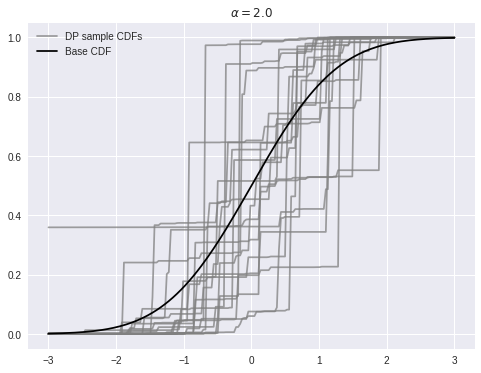

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
        label='DP sample CDFs');
ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

ax.set_title(r'$\alpha = {}$'.format(alpha));
ax.legend(loc=2);

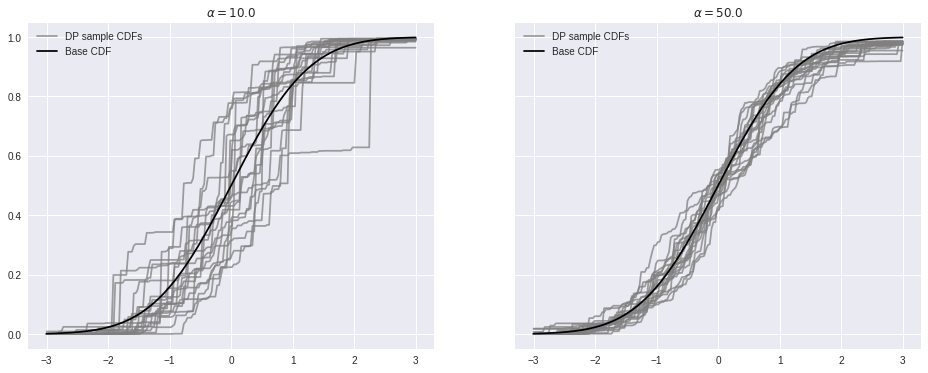

In [40]:
fig , (l_ax ,r_ax) = plt.subplots(ncols=2 , sharex = True, sharey= True , figsize= (16,6)) 
K =50 ; alpha= 10.

beta= sp.stats.beta.rvs(1, alpha, size=(N,K ))
w= np.empty_like(beta)
w[:,0] = beta[:, 0]
w[:,1:] = beta[:, 1:]*(1-beta[:, :-1]).cumprod(axis=1)



omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

l_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
l_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
l_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

l_ax.set_title(r'$\alpha = {}$'.format(alpha));
l_ax.legend(loc=2);

K = 200
alpha = 50.

beta = sp.stats.beta.rvs(1, alpha, size=(N, K))
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

omega = P0.rvs(size=(N, K))

sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

r_ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
          label='DP sample CDFs');
r_ax.plot(x_plot, sample_cdfs[1:].T, c='gray', alpha=0.75);
r_ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

r_ax.set_title(r'$\alpha = {}$'.format(alpha));
r_ax.legend(loc=2);


alpha 가 무한대로 갈 수록 Dirichlet process 에 converge 하게 된다.

In [43]:
print(beta[:,:-1].shape)
print(w[...,np.newaxis].shape)
print(np.less([1, 2,3], [2, 2,4])) ## Return the truth value of (x1 < x2) element-wise.  bool or ndarray of bool
print("-----------------------------------")
print(np.less.outer([1, 2,3], [2, 2,4])) ## 외적  1< 2 TRUE 1< 2 TRUE  1< 4  TRUE  2<2 False  2<2 False 2<4 True ....
print( np.less.outer(omega, x_plot).shape)
print((w[..., np.newaxis] * np.less.outer(omega, x_plot)).shape)

(20, 199)
(20, 200, 1)
[ True False  True]
-----------------------------------
[[ True  True  True]
 [False False  True]
 [False False  True]]
(20, 200, 200)
(20, 200, 200)


Dirichlet process mixtures

the (almost sure) discreteness of samples from the Dirichlet process is a significant drawback

=> This problem can be solved with another level of indirection by using Dirichlet process mixtures for density estimation.

prior = theta~ N(0,1) alpha = 2  likelihood = N(theata , (0.3)^2 ) 

In [47]:
N=50 ; K=30 ; alpha= 2

P0 = sp.stats.norm

f= lambda x, theta : sp.stats.norm.pdf(x, theta,0.3)
print(x_plot[np.newaxis, np.newaxis, :].shape)


(1, 1, 200)


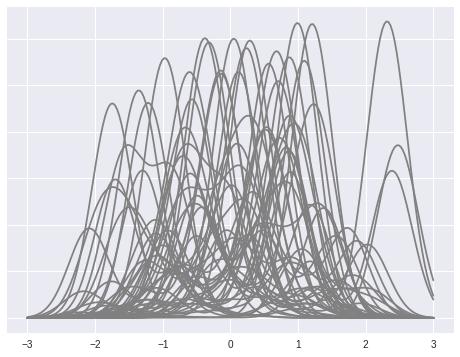

In [46]:
beta = sp.stats.beta.rvs(1, alpha , size= (N, K))
w= np.empty_like(beta)
w[: , 0] = beta[:,0]
w[: ,1:] = beta[:, 1:]* (1-beta[:,:-1]).cumprod(axis=1)

theta = P0.rvs(size=(N,K))

dpm_pdf_components = f(x_plot[np.newaxis , np.newaxis, :], theta[..., np.newaxis])
dpm_pdfs = (w[... , np.newaxis] * dpm_pdf_components).sum(axis=1)

fig ,ax = plt.subplots(figsize= (8,6))

ax.plot(x_plot, dpm_pdfs.T , c="gray")
ax.set_yticklabels([]) ; 

In [56]:
dpm_pdfs.shape

(50, 200)

## single mixture 에 집중하기 위해 개개인 mixsture 구성별로 decompose 시키기

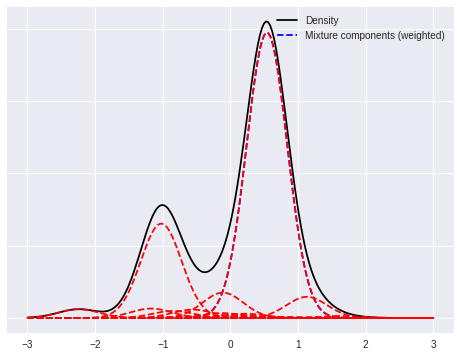

In [60]:
fig, ax = plt.subplots(figsize=(8,6))

ix = 12

ax.plot(x_plot, dpm_pdfs[ix], c='k', label='Density');
ax.plot(x_plot, (w[..., np.newaxis] * dpm_pdf_components)[ix, 0],
        '--', c='blue', label='Mixture components (weighted)');

ax.plot(x_plot, (w[..., np.newaxis] * dpm_pdf_components)[ix].T,
        '--', c='red');
ax.set_yticklabels([])
ax.legend(loc=1)

In [69]:
old_faithful_df = get_rdataset('faithful', cache=True).data[['waiting']]
type(old_faithful_df)
print(old_faithful_df.shape)
print(old_faithful_df.waiting[10:20])

(272, 1)
10    54
11    84
12    78
13    47
14    83
15    52
16    62
17    84
18    52
19    79
Name: waiting, dtype: int64


In [70]:
old_faithful_df["std_waiting"] = (old_faithful_df.waiting - old_faithful_df.waiting.mean()) /  old_faithful_df.waiting.std()
old_faithful_df.head()

,waiting,std_waiting
0,79,0.596025
1,54,-1.242890
2,74,0.228242
3,62,-0.654437
4,85,1.037364


Text(0,0.5,'number of eruptions')

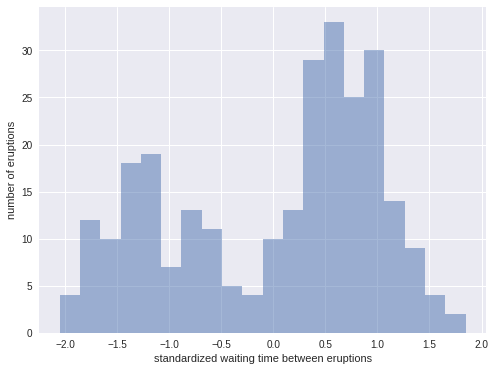

In [71]:
fig , ax  = plt.subplots(figsize=(8,6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting , bins=n_bins ,color=blue , lw=0, alpha=0.5) 

ax.set_xlabel("standardized waiting time between eruptions") 
ax.set_ylabel("number of eruptions")

## various clever Gibbs sampling techniques for Dirichlet processes
that allow the number of components stored to grow as needed

 [stochastic memorization](http://danroy.org/papers/RoyManGooTen-ICMLNPB-2008.pdf) is another powerful technique for simulating Dirichlet processes while only storing finitely many components in memory.
 
This model is therefore actually a mixture of Dirichlet process mixtures, since each fixed value of α results in a Dirichlet process mixture.

In [0]:
N = old_faithful_df.shape[0]

K =30


In [0]:
with pm.Model() as model :
    alpha = pm.Gamma("alpha" , 1., 1.)
    beta= pm.Beta("beta", 1. ,alpha , shape=K)
    w = pm.Deterministic('w', beta * T.concatenate([[1], T.extra_ops.cumprod(1 - beta)[:-1]]))
    component = pm.Categorical("component" , w, shape =N)
    
    tau = pm.Gamma("tau" , 1. ,1. , shape=K)
    lambda_ = pm.Uniform("lambda", 0, 5 , shape=K)
    mu = pm.Normal("mu", 0, lambda_ * tau , shape=K)
    obs = pm.Normal("obs", mu[component] , lambda_[component]*tau[component] , observed = old_faithful_df.std_waiting.values )

We sample from the posterior distribution 20,000 times, burn the first 10,000 samples, and thin to every tenth sample.

In [83]:
with model :
    step1 =pm.Metropolis(vars =[alpha , beta ,w ,lambda_ ,tau, mu, obs])
    step2 = pm.ElemwiseCategorical([component])  ## pm.ElemwiseCategoricalStep([component], np.arange(K)) 써야하는데 안나온다.
    
    trace_ = pm.sample(20000, [ step1, step2])
    
trace =trace_[10000:: 10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [mu]
>>Metropolis: [tau_log__]
>>Metropolis: [lambda_interval__]
>>Metropolis: [beta_logodds__]
>>Metropolis: [alpha_log__]
>ElemwiseCategorical: [component]
  4%|▍         | 829/20500 [00:09<03:56, 83.32it/s]/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
  7%|▋         | 1360/20500 [00:16<03:48, 83.83it/s]

  0%|          | 0/20500 [00:00<?, ?it/s]

100%|██████████| 20500/20500 [03:55<00:00, 87.03it/s]


/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


(2000, 272)


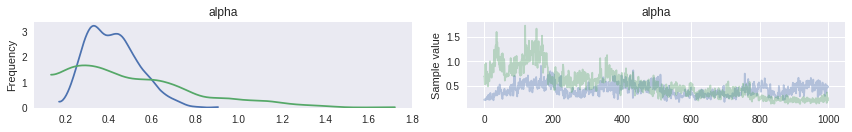

In [94]:
pm.traceplot(trace, varnames=["alpha"])
print(trace["component"].shape)

To verify that our truncation point is not biasing our results, we plot the distribution of the number of mixture components used.

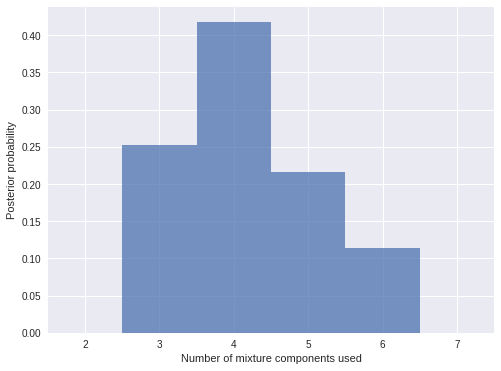

In [85]:
n_components_used = np.apply_along_axis(lambda x: np.unique(x).size, 1, trace['component'])
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.arange(n_components_used.min(), n_components_used.max() + 1)
ax.hist(n_components_used + 1, bins=bins, normed=True, lw=0, alpha=0.75);

ax.set_xticks(bins + 0.5);
ax.set_xticklabels(bins);
ax.set_xlim(bins.min(), bins.max() + 1);
ax.set_xlabel('Number of mixture components used');

ax.set_ylabel('Posterior probability');

히스토그램을 보면 5개의 mixture components 가 대다수를 차지한느 것을 확인 할 수 있다. 그리고 가장 많은 경우는 8개의 mixture models 들이 합쳐져 있다 .

때문에 우리가 30개의 components로 truncated 했기 때문에  우리의 결과는 bias가 없다는데 확신을 가질 수 있다. 

사후 분포를 계산해본다

In [0]:
post_pdf_contribs = sp.stats.norm.pdf(np.atleast_3d(x_plot),
                                      
                                      trace['mu'][:, np.newaxis, :],
                                      
                                      1. / np.sqrt(trace['lambda'] * trace['tau'])[:, np.newaxis, :])

post_pdfs = (trace['w'][:, np.newaxis, :] * post_pdf_contribs).sum(axis=-1)

post_pdf_low, post_pdf_high = np.percentile(post_pdfs, [2.5, 97.5], axis=0)



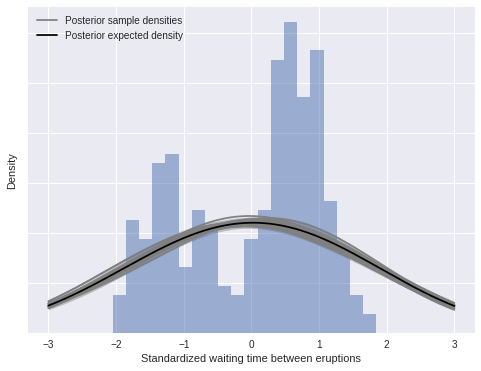

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting.values, bins=n_bins, normed=True,
        color=blue, lw=0, alpha=0.5);

ax.fill_between(x_plot, post_pdf_low, post_pdf_high,
                color='gray', alpha=0.45);
ax.plot(x_plot, post_pdfs[0],
        c='gray', label='Posterior sample densities');
ax.plot(x_plot, post_pdfs[::100].T, c='gray');
ax.plot(x_plot, post_pdfs.mean(axis=0),
        c='k', label='Posterior expected density');

ax.set_xlabel('Standardized waiting time between eruptions');

ax.set_yticklabels([]);
ax.set_ylabel('Density');

ax.legend(loc=2);

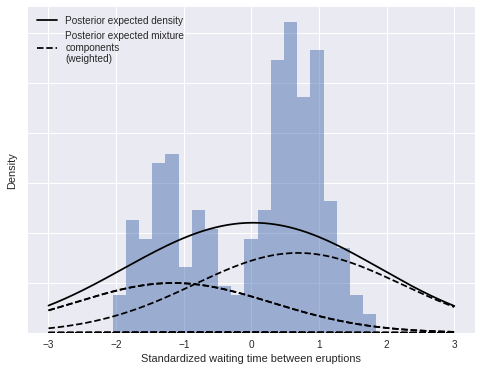

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))

n_bins = 20
ax.hist(old_faithful_df.std_waiting.values, bins=n_bins, normed=True,
        color=blue, lw=0, alpha=0.5);

ax.plot(x_plot, post_pdfs.mean(axis=0),
        c='k', label='Posterior expected density');
ax.plot(x_plot, (trace['w'][:, np.newaxis, :] * post_pdf_contribs).mean(axis=0)[:, 0],
        '--', c='k', label='Posterior expected mixture\ncomponents\n(weighted)');
ax.plot(x_plot, (trace['w'][:, np.newaxis, :] * post_pdf_contribs).mean(axis=0),
        '--', c='k');

ax.set_xlabel('Standardized waiting time between eruptions');

ax.set_yticklabels([]);
ax.set_ylabel('Density');

ax.legend(loc=2);

## pm.ElemwiseCategoricalStep 사용해야하는데 pm.ElemwiseCategorical([component]) 밖에 안나와서 이걸 사용하니 output이 엉망으로 나온다

# 결론적으로는 Dirchelet 분포를 이용해서 mixture model을 만들면 Flexible 하게 분포 표현이 가능하다.

